In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd

In [ ]:
#file = pd.read_csv("/Users/aditijain/Desktop/NewFolderWithItems/facebook-v-predicting-check-ins/train.csv")
file = pd.read_csv("E:/GitHub/train.csv")
file.head()

In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices()) 

In [5]:
file.values

array([[0.00000000e+00, 7.94100000e-01, 9.08090000e+00, 5.40000000e+01,
        4.70702000e+05, 8.52306562e+09],
       [1.00000000e+00, 5.95670000e+00, 4.79680000e+00, 1.30000000e+01,
        1.86555000e+05, 1.75772671e+09],
       [2.00000000e+00, 8.30780000e+00, 7.04070000e+00, 7.40000000e+01,
        3.22648000e+05, 1.13753724e+09],
       ...,
       [2.91180180e+07, 2.99930000e+00, 6.36800000e+00, 6.70000000e+01,
        7.37758000e+05, 2.83833430e+09],
       [2.91180190e+07, 4.06370000e+00, 8.00610000e+00, 7.00000000e+01,
        7.64975000e+05, 1.00735585e+09],
       [2.91180200e+07, 7.45230000e+00, 2.08710000e+00, 1.70000000e+01,
        1.02842000e+05, 7.02869813e+09]])

In [6]:
for col in file.columns:
    print(col)

row_id
x
y
accuracy
time
place_id


In [71]:
x_train = np.array(file.values[:,1:-1])
print(x_train[0:4])

[[7.94100e-01 9.08090e+00 5.40000e+01 4.70702e+05]
 [5.95670e+00 4.79680e+00 1.30000e+01 1.86555e+05]
 [8.30780e+00 7.04070e+00 7.40000e+01 3.22648e+05]
 [7.36650e+00 2.51650e+00 6.50000e+01 7.04587e+05]]


In [72]:
x_train.shape

(29118021, 4)

In [74]:
distinct = 1
myset = set([file.values[0,-1]])
for y in file.values[:,-1]:
    if(y not in myset):
        distinct+=1
        myset.add(y)
print(distinct)

108390


In [ ]:
y_train = np.array(file.values[:,-1]).reshape(-1,1)
x_train = x_train[0:100000]
y_train = y_train[0:100000]
print(y_train[0:4])

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [47]:
x_train

array([[-1.46542508,  1.41373896, -0.24877642,  0.23025297],
       [ 0.34093978, -0.06645156, -0.60688306, -1.00088616],
       [ 1.16357653,  0.70883368, -0.07409025, -0.41122864],
       ...,
       [-1.21423589,  1.56952849,  0.29275069, -1.20689996],
       [-1.26287121, -0.46008875, -0.37105674,  0.50123642],
       [-0.11637221, -0.51526637,  1.28846184, -0.18878936]])

In [48]:
f = lambda x: x % 41
g=lambda x: x%2

In [49]:
y_train=f(y_train)

In [50]:
y_train[0:4]

array([[16.],
       [10.],
       [25.],
       [34.]])

In [51]:
y_train=g(y_train)

In [52]:
y_train[0:4]

array([[0.],
       [0.],
       [1.],
       [0.]])

In [53]:
print(y_train.shape)
print(sum(y_train))

(100000, 1)
[48557.]


# Kraska Hash Model

In [57]:
batch_size = len(x_train)
input_dim = x_train.shape[1]
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
optimizer = Adam()
verbosity_mode = 0

In [67]:
layer_size = 500
number_of_epochs = 2000
model = Sequential()
model.add(Dense(layer_size,input_dim=input_dim,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               2500      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 501       
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


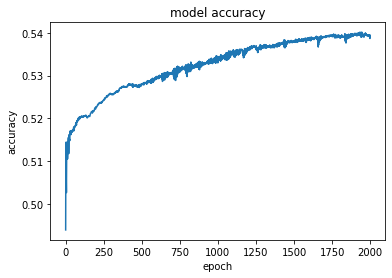

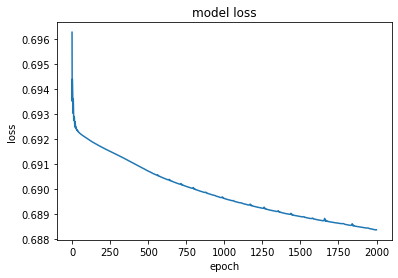

In [68]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [69]:
model.save('model1.h5')

In [70]:
import os
# Get file size in bytes for a given model
os.stat('model1.h5').st_size/1024

79.015625